In [3]:
%pip install tensorflow --ignore-installed --user

     |████████████████████████████████| 217.4 MB 2.5 kB/s ta 0:00:015   |█                               | 6.2 MB 166 kB/s eta 0:21:07     |█▋                              | 11.1 MB 165 kB/s eta 0:20:49     |█▊                              | 11.6 MB 172 kB/s eta 0:19:52     |██▋                             | 17.6 MB 137 kB/s eta 0:24:15     |█████████████                   | 87.6 MB 284 kB/s eta 0:07:36     |████████████████▎               | 110.3 MB 117 kB/s eta 0:15:15     |███████████████████▎            | 131.3 MB 183 kB/s eta 0:07:49     |████████████████████            | 136.3 MB 357 kB/s eta 0:03:48     |█████████████████████████████▎  | 198.8 MB 7.7 kB/s eta 0:40:20
     |████████████████████████████████| 126 kB 122 kB/s eta 0:00:01
     |████████████████████████████████| 13.0 MB 162 kB/s eta 0:00:01
     |████████████████████████████████| 5.8 MB 65 kB/s eta 0:00:014
     |████████████████████████████████| 42 kB 119 kB/s eta 0:00:01
     |████████████████████████████████| 961 k

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
spyder 4.2.5 requires pyqt5<5.13, which is not installed.
spyder 4.2.5 requires pyqtwebengine<5.13, which is not installed.
conda-repo-cli 1.0.4 requires pathlib, which is not installed.
anaconda-project 0.9.1 requires ruamel-yaml, which is not installed.
astroid 2.5 requires wrapt<1.13,>=1.11, but you have wrapt 1.13.3 which is incompatible.
Note: you may ne

In [4]:
%pip install opencv-python

     |████████████████████████████████| 46.0 MB 35 kB/s eta 0:00:014    |██████▍                         | 9.2 MB 40 kB/s eta 0:15:03
Note: you may need to restart the kernel to use updated packages.


In [10]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
from PIL import Image
import cv2
from  matplotlib import pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
from sklearn.metrics import confusion_matrix, classification_report

In [29]:
def create_dataset(img_folder):
    
    image_path_list = []
    img_data_array = []   
    f = open('filee.txt', "a")
    for file in os.listdir(img_folder):
        image_path = os.path.join(img_folder, file)
        image = cv2.imread(image_path, cv2.COLOR_BGR2RGB)
        if image is not None:
            image = np.array(image)
            image = cv2.resize(image, (32, 32),interpolation = cv2.INTER_AREA)
            if image.shape == (32,32,3):
                img_data_array.append(image)
                image_path_list.append(image_path)
            else:
                f.write(image_path + '\n')
    f.close()       
    print(len(img_data_array))
    print(len(image_path_list))
    
    return img_data_array
            
X = create_dataset(r'datasets/real/train4')

3500
3500


In [30]:
labels = pd.read_excel('datasets/real/datalabels.xlsx')
labels.head(10)

,id,labels
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
5,6,0
6,7,0
7,8,0
8,9,0
9,10,0


In [31]:
from sklearn.model_selection import train_test_split
y = labels['labels']
y = np.array(y)
X = np.array(X)
print(X.shape)
print(y.shape)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)

(3500, 32, 32, 3)
(3500,)


In [32]:
print(X_train.shape)
print(y_train.shape)
y_train = y_train.reshape(-1,)
y_train[:20]

(2800, 32, 32, 3)
(2800,)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

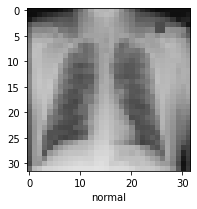

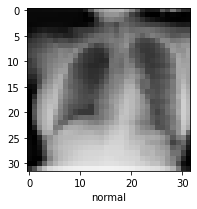

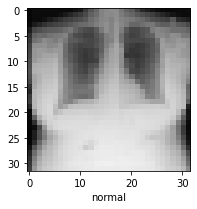

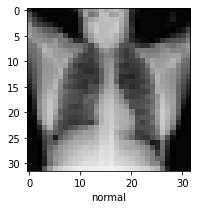

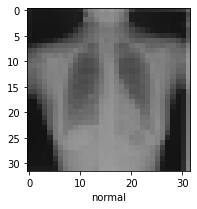

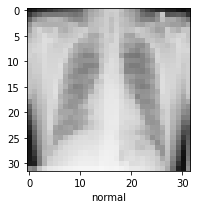

In [33]:
# classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]
classes = ["normal","tuberculosis"]

def plot_sample(A, b, index):
    plt.figure(figsize = (20,3))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

# plot_sample(X_train, y_train, 4490)
# plot_sample(X_train, y_train, 2873)
# plot_sample(X_train, y_train, 4321)
# plot_sample(X_train, y_train, 4343)
# plot_sample(X_train, y_train, 3000)
# plot_sample(X_train, y_train, 4000)

plot_sample(X_train, y_train, 32)
plot_sample(X_train, y_train, 56)
plot_sample(X_train, y_train, 95)
plot_sample(X_train, y_train, 96)
plot_sample(X_train, y_train, 21)
plot_sample(X_train, y_train, 43)

In [34]:
X_train = X_train / 255
X_test = X_test / 255

model = models.Sequential([
    layers.Flatten(input_shape = (32,32,3)),
    layers.Dense(3000, activation="relu"),
    layers.Dense(1000, activation = "relu"),
    layers.Dense(10, activation = "sigmoid")
])

model.compile(optimizer = "SGD",
              loss = "sparse_categorical_crossentropy",
              metrics = ["accuracy"])

model.fit(X_train, y_train, epochs=5)

Epoch 1/5
88/88 [==============================] - 7s 70ms/step - loss: 0.0447 - accuracy: 0.9886
Epoch 2/5
88/88 [==============================] - 6s 69ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 3/5
88/88 [==============================] - 6s 70ms/step - loss: 7.2507e-04 - accuracy: 1.0000
Epoch 4/5
88/88 [==============================] - 6s 70ms/step - loss: 5.2499e-04 - accuracy: 1.0000
Epoch 5/5
88/88 [==============================] - 6s 71ms/step - loss: 4.1254e-04 - accuracy: 1.0000


In [37]:
model.evaluate(X_test, y_test)

print(" ")
print(" ")

y_pred = model.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]
print("classification_report: \n", classification_report(y_test, y_pred_classes))

22/22 [==============================] - 1s 30ms/step - loss: 4.8077e-04 - accuracy: 1.0000
 
 
classification_report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       700

    accuracy                           1.00       700
   macro avg       1.00      1.00      1.00       700
weighted avg       1.00      1.00      1.00       700



In [35]:
cnn = models.Sequential([
#     cnn
    layers.Conv2D(filters = 32, kernel_size = (3,3), activation = "relu", input_shape = (32,32,3)),
    layers.MaxPooling2D(),
    
    layers.Conv2D(filters = 32, kernel_size = (3,3), activation = "relu", input_shape = (32,32,3)),
    layers.MaxPooling2D(),
    
#     dense
    layers.Flatten(),
    layers.Dense(64, activation="relu"),
    layers.Dense(1000, activation = "relu"),
                
])

cnn.compile(optimizer = "SGD",
              loss = "sparse_categorical_crossentropy",
              metrics = ["accuracy"])

cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
88/88 [==============================] - 4s 41ms/step - loss: 1.0540 - accuracy: 0.9429
Epoch 2/10
88/88 [==============================] - 3s 37ms/step - loss: 1.1048e-04 - accuracy: 1.0000
Epoch 3/10
88/88 [==============================] - 3s 35ms/step - loss: 1.0906e-04 - accuracy: 1.0000
Epoch 4/10
88/88 [==============================] - 3s 35ms/step - loss: 1.0873e-04 - accuracy: 1.0000
Epoch 5/10
88/88 [==============================] - 3s 35ms/step - loss: 1.0871e-04 - accuracy: 1.0000
Epoch 6/10
88/88 [==============================] - 3s 35ms/step - loss: 1.0871e-04 - accuracy: 1.0000
Epoch 7/10
88/88 [==============================] - 3s 35ms/step - loss: 1.0871e-04 - accuracy: 1.0000
Epoch 8/10
88/88 [==============================] - 3s 35ms/step - loss: 1.0871e-04 - accuracy: 1.0000
Epoch 9/10
88/88 [==============================] - 3s 35ms/step - loss: 1.0871e-04 - accuracy: 1.0000
Epoch 10/10
88/88 [==============================] - 3s 35ms/step - loss: 1.0

In [36]:
cnn.evaluate(X_test, y_test)

print(" ")
print(" ")

y_pred = cnn.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("classification_report: \n", classification_report(y_test, y_pred_classes))

22/22 [==============================] - 0s 10ms/step - loss: 1.3642e-04 - accuracy: 1.0000
 
 
classification_report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       700

    accuracy                           1.00       700
   macro avg       1.00      1.00      1.00       700
weighted avg       1.00      1.00      1.00       700

